In [11]:
import sys
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
from sklearn.decomposition import TruncatedSVD
from scipy.spatial import distance
from sklearn.preprocessing import Binarizer,Normalizer
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from skimage.transform import downscale_local_mean
from sklearn.cluster import KMeans


In [12]:
def assign_center(train_data, k):
    centers = []
    centers.append(train_data[np.random.randint(train_data.shape[0]), :])
    as_id = 0
    while as_id < (k - 1):
        dist_arr = []
        for i in range(train_data.shape[0]):
            value = train_data[i, :]
            d = sys.maxsize
            for j in range(len(centers)):
                temp_dist = np.sum((value - centers[j]) ** 2)
                if(d<temp_dist):
                    d = d
                if(d>temp_dist):
                    d=temp_dist
            dist_arr.append(d)
        as_id+=1
        dist_arr = np.array(dist_arr)
        new_centroid = train_data[np.argmax(dist_arr), :]
        centers.append(new_centroid)
        dist_arr = []
    return centers

In [13]:
def KMeans_implementation(Y):
    rv = np.random.RandomState(2)
    Y = np.array(Y)
    i = rv.permutation(Y.shape[0])[:3]
    centroids = assign_center(Y,3)
    centroids = np.array(centroids)
    while True:
        temp = []
        distance_points = distance.cdist(Y, centroids)
        for i in distance_points:
            temp.append(np.where(i == i.min())[0][0])
        clusters = np.asarray(temp)
        new_centers = np.array([Y[clusters == i].mean(0) for i in range(3)])
        if np.all(centroids == new_centers):
            break
        centroids = new_centers
    return clusters

In [14]:
X = []
def getData(file):
    for line in open(file):
        temp = line.split(',')
        list = []
        for t in temp:
            list.append(float(t))
        X.append(list)
    return X
train = getData('part2_test.txt')
train = np.array(train).astype(np.float64)

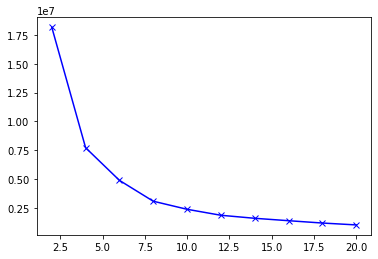

In [15]:
train = Binarizer().fit_transform(train)
reshape_train = np.reshape(train, (10000,28,28))
image_scaled = downscale_local_mean(reshape_train, (1,2,2))
reshape_train = np.reshape(image_scaled,(10000,196))
reshape_train = Normalizer(norm='max').fit_transform(reshape_train)
tsne = TSNE()
tsne_values  = tsne.fit_transform(reshape_train)
labels = KMeans_implementation(tsne_values)
sum_of_square=[]
tsne_data=tsne_values.flatten()
k= range(2,22,2)
for i in range(2,22,2):
    centers=KMeans_implementation(tsne_values)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tsne_values)
    sum_of_square.append(kmeans.inertia_)
plt.plot(k, sum_of_square, 'bx-')
plt.show()

In [16]:
f = open("part2.txt", "w")
for a in labels:
    f.write(str(a+1))
    f.write("\n")
f.close()

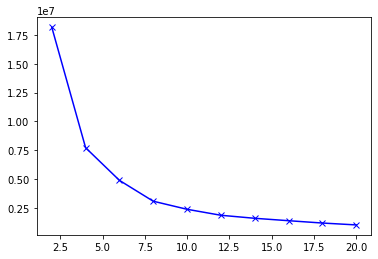

In [17]:
plt.plot(k, sum_of_square, 'bx-')
plt.show()